In [15]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import pyzx as zx
from extraction.focus_gflow_graph import *
from extraction.perceval import *
import perceval as pcvl
from qiskit import transpile, QuantumCircuit
from qiskit.circuit.library.basis_change import qft

def to_graph_like(g):
    zx.spider_simp(g)
    zx.to_gh(g)
    zx.id_simp(g)
    zx.spider_simp(g)

In [8]:
circuit='./circuits/grover-orig.qasm'
#circuit='./circuits/grover.qasm'
#circuit='./circuits/vbe_adder_3.qasm'
#circuit='QASMBench/small/linearsolver_n3/linearsolver_n3.qasm'
#circuit='QASMBench/small/qaoa_n3/qaoa_n3.qasm'
circuit='QASMBench/small/bell_n4/bell_n4.qasm'
#circuit='./circuits/grover-2.qasm'
ft = qft.QFT(16)
ft = transpile(ft, basis_gates=['cx','cz','rx','rz','h'])

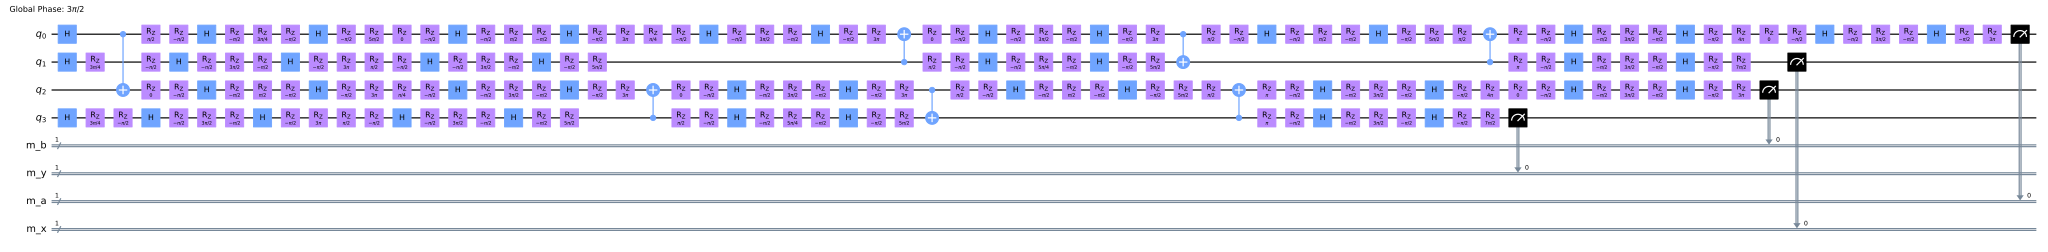

In [9]:
qc = QuantumCircuit.from_qasm_file(circuit)
qc = transpile(qc, basis_gates=['id','cx', 'cz', 'rz', 'h'])
qc.draw(output='mpl', scale=0.75, fold=0)

In [19]:
c = zx.Circuit.from_qasm(qc.qasm())
#c = zx.Circuit.from_qasm(ft.qasm())
g = c.to_graph()
to_graph_like(g)
zx.simplify.clifford_simp(g)
zx.full_reduce(g)
zx.simplify.interior_clifford_simp(g)

zx.draw(g, labels=True)

#print(g.to_tikz())

spider_simp: 54. 39. 26. 19. 8. 3.  6 iterations
id_simp: 2.  1 iterations
spider_simp: 2.  1 iterations


In [17]:
p = PercevalExtraction(g.to_json())
zx.draw(p.graph, labels=True)
print(f'Graph: inputs: {p.graph.inputs()}, outputs {p.graph.outputs()}')
p.extract_clusters_from_graph_ghz_first()
for c in p.experiment.get_all_clusters().values():
    if c.graph is not None:
        zx.draw(c.graph, labels=True)
p.create_setup()
ca, exp = p.run()

Graph: inputs: (10, 11, 12, 13), outputs (14, 15, 16, 17)


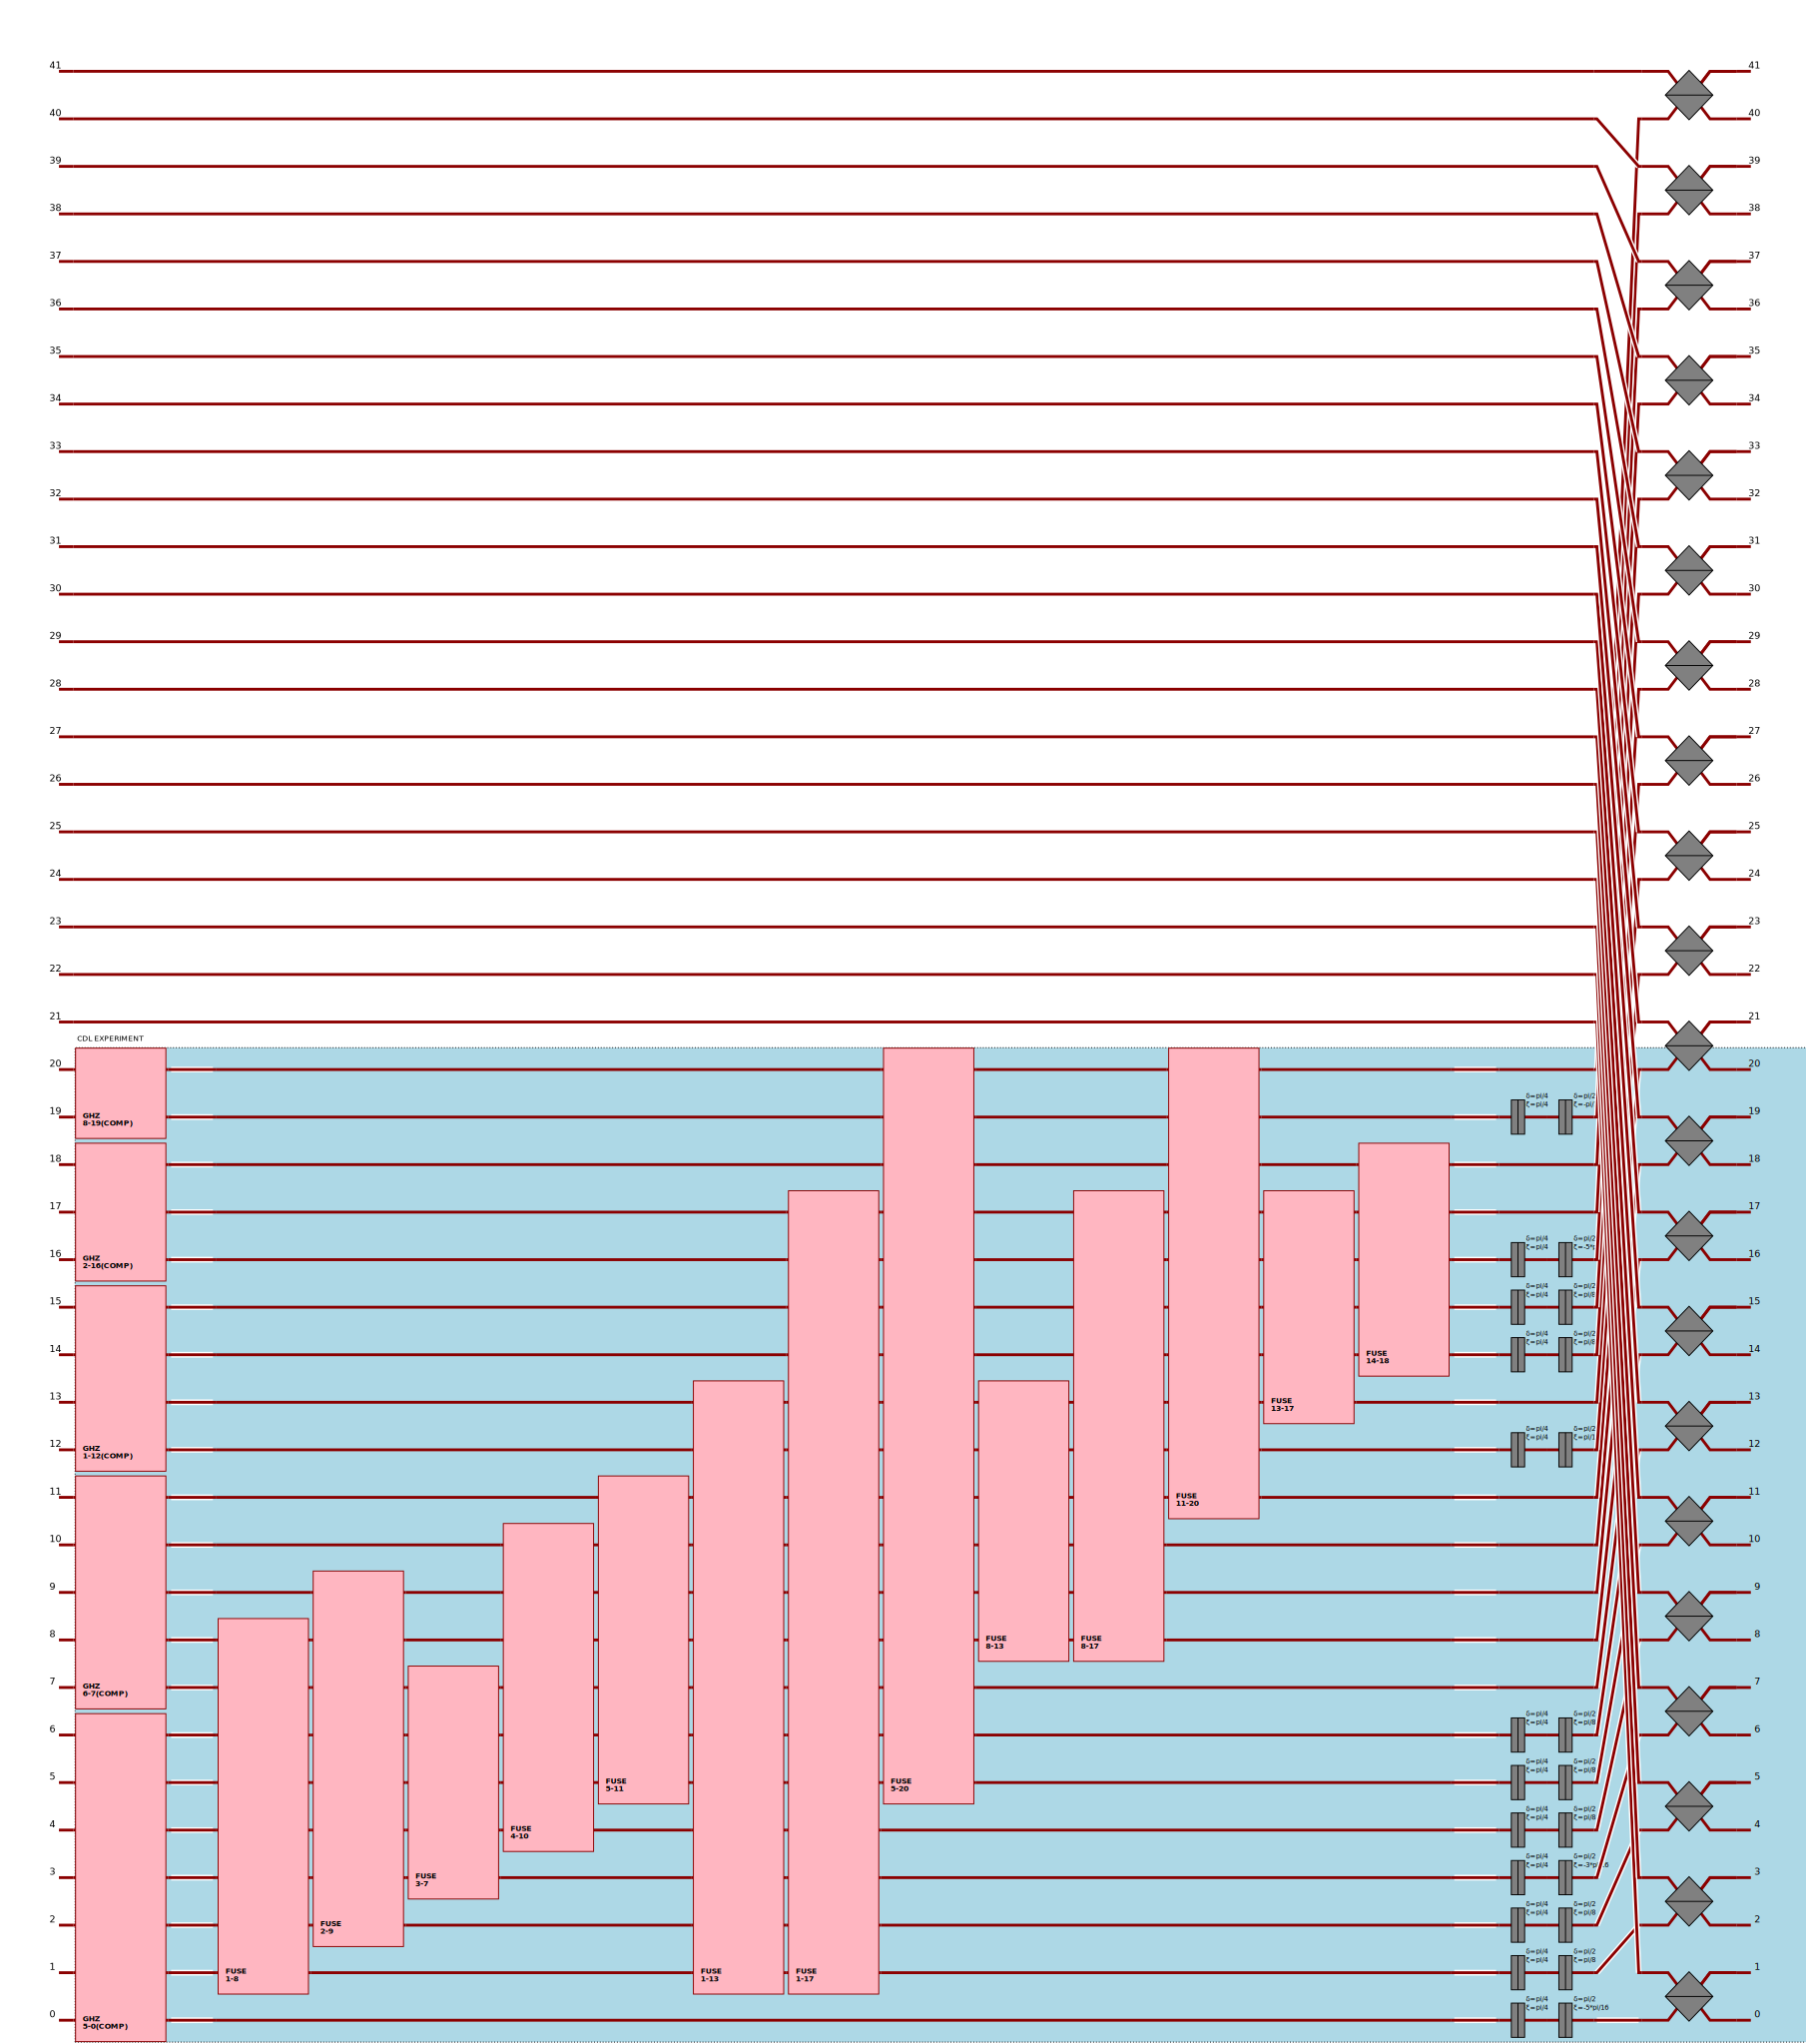

In [13]:
pcvl.pdisplay(exp,recursive=True)

In [7]:
pcvl.pdisplay(ca)

KeyboardInterrupt: 

In [7]:
g2 = zx.Graph.from_json(g.to_json())
to_graph_like(g2)
zx.simplify.clifford_simp(g2)
zx.full_reduce(g2)
g2 = g2.copy()
g2.normalize()
zx.draw(g2, labels=True)

spider_simp: 1. 1.  2 iterations


In [ ]:
g2.phase(0)

In [ ]:
p = PercevalExtraction(g2.to_json())
p.extract_clusters_from_graph_ghz_first()

print("GHZ-Clusters")
print(p.experiment.ghz_circuits)
print("Lin Clusters")
print(p.experiment.lin_circuits)
exp = p.create_setup(True, False)
# p.reorder_before_measurement()
print("GHZ-Clusters")
print(p.experiment.ghz_circuits)
print("Lin Clusters")
print(p.experiment.lin_circuits)
print("Fusion: " + str(len(p.experiment.fusion_circuits)))
print(p.experiment.fusion_circuits)
pcvl.pdisplay(exp)
#print("Components: " + str(exp.ncomponents()))
#print("Photons: " + str(exp.m))
#list(p.ghz_graphs.values()) + list(p.lin_graphs.values())
#zx.tikz.to_tikz_sequence(p.ghz_graphs.values() + p.lin_graphs.values())

In [24]:
p = PercevalExtraction(g2.to_json())
p.extract_clusters_from_graph_ghz_first()

print("GHZ-Clusters")
print(p.experiment.ghz_circuits)
print("Lin Clusters")
print(p.experiment.lin_circuits)
exp = p.create_setup(True, False)
# p.reorder_before_measurement()
print("GHZ-Clusters")
print(p.experiment.ghz_circuits)
print("Lin Clusters")
print(p.experiment.lin_circuits)
print("Fusion: " + str(len(p.experiment.fusion_circuits)))
print(p.experiment.fusion_circuits)
pcvl.pdisplay(exp)
#print("Components: " + str(exp.ncomponents()))
#print("Photons: " + str(exp.m))
#list(p.ghz_graphs.values()) + list(p.lin_graphs.values())
#zx.tikz.to_tikz_sequence(p.ghz_graphs.values() + p.lin_graphs.values())

GHZ-Clusters
{5-0(COMP): GHZ[5-0(COMP), 1-1(COMP), 3-2(COMP), 4-3(COMP), 6-4(COMP)], 0-5(COMP): GHZ[0-5(COMP), 3-6(WITNESS), 4-7(WITNESS)], 5-11(WITNESS): GHZ[5-11(WITNESS), 1-12(WITNESS), 3-13(WITNESS), 4-14(WITNESS), 6-15(WITNESS)], 0-16(WITNESS): GHZ[0-16(WITNESS), 3-17(WITNESS), 4-18(WITNESS)], 5-22(WITNESS): GHZ[5-22(WITNESS), 1-23(WITNESS), 3-24(WITNESS), 4-25(WITNESS), 6-26(WITNESS)], 0-27(WITNESS): GHZ[0-27(WITNESS), 3-28(WITNESS), 4-29(WITNESS)]}
Lin Clusters
{3-8(WITNESS): LIN[3-8(WITNESS), 2-9(COMP), 4-10(WITNESS)], 3-19(WITNESS): LIN[3-19(WITNESS), 2-20(COMP), 4-21(WITNESS)], 3-30(WITNESS): LIN[3-30(WITNESS), 2-31(COMP), 4-32(WITNESS)]}


AssertionError: range must a consecutive valid set of ports

In [ ]:
p = PercevalExtraction(g2.to_json())
p.extract_clusters_from_graph_ghz_first()
exp,cluster = p.create_setup(True, False)
p.reorder_before_measurement()

In [ ]:
def reorder_before_measurement(self):
    perm = list(range(0, self.total_photons))
    print(perm)
    i = self.total_photons-1
    # put all fusions whitnesses to the bottom of the circuit
    for ver in self.fusion_circuits.keys():
        for w in self.get_whitnesses(ver):
            perm[w] = i
            self.update_whitnesses(ver, w, i)
            self.update_photon(w, i)
            perm[i] = w
            self.update_photon(i, w)
            i = i - 1

    # put all outputs aka readouts at the top of the circuit
    i = 0
    for outs in map (lambda o: list(self.graph.neighbors(o))[0], list(self.graph.outputs())):
        if outs in self.fusion_circuits.keys():
            orig = self.update_origin(outs, i)
            perm[i] = orig
            self.update_photon(orig, i)
            perm[orig] = i
            self.update_photon(i, orig)
        else:
            ph = self.get_photon_for_node(outs)
            perm[i] = ph
            self.update_photon(ph, i)
            perm[ph] = i
            self.update_photon(i, ph)
        i = i + 1
    return perm
    #return symb.PERM(perm)

In [ ]:
import perceval as pcvl
from perceval.converters import QiskitConverter
import perceval.lib.phys as phys
from qiskit import transpile, QuantumCircuit
from qiskit.circuit.library.basis_change import qft

qc = QuantumCircuit.from_qasm_file('./QASMBench/small/toffoli_n3/toffoli_n3.qasm')
qc = transpile(qft.QFT(4), basis_gates=['cx', 'rx', 'rz', 'h'])

qiskit_converter = QiskitConverter(phys)
quantum_processor = qiskit_converter.convert(qc, heralded=True)
#pcvl.pdisplay(quantum_processor, recursive=True)


print("Components: " + str(quantum_processor.circuit.ncomponents()))
print("Photons: " + str(quantum_processor.circuit.m))

# Visualisation

In [10]:
from ipywidgets import widgets
from IPython.display import display, Markdown

from pyzx.simplify import clifford_iter

graph = c.to_graph()
graphs = [zx.draw_matplotlib(graph)]
names = ["start"]
for gs, n in clifford_iter(graph):
    graphs.append(zx.draw_matplotlib(gs))
    names.append(n)
zx.drawing.pack_circuit_nf(gs,'grg')
graphs.append(zx.draw_matplotlib(gs))
names.append("reposition")

def plotter(rewrite):
    display(Markdown("Rewrite step: " + names[rewrite]))
    display(graphs[rewrite])

w = widgets.interactive(plotter, rewrite=(0,len(graphs)-1))
slider = w.children[0]
slider.layout.width = "{!s}px".format(min(800,50*len(graphs)))
output = w.children[-1]
output.layout.height = "{!s}px".format(200+graph.qubit_count()*20)
slider.value = 0
w

interactive(children=(IntSlider(value=0, description='rewrite', layout=Layout(width='550px'), max=10), Output(…

# Stuff

In [ ]:
import numpy as np
100 < np.inf

In [ ]:
fg_graph = build_focused_gflow_graph(g, focus_gflow(g, gflow(g)))
zx.draw(fg_graph, labels=True)

In [ ]:
p = PercevalExtraction(g.to_json())

In [ ]:
g2 = g.copy()
fg_graph = build_focused_gflow_graph(g2, focus_gflow(g2, gflow(g2)))
list(fg_graph.neighbors(20))[0]
20 not in fg_graph.inputs()
fg_graph.outputs()
max(fg_graph.vertices())

In [ ]:
g2 = g.copy()
fg_graph = build_focused_gflow_graph(g2, focus_gflow(g2, gflow(g2)))
w_graph = g2.copy()
i = 0
neighbors_list = []
lin_clusters = {}
ghz_clusters = {}
fusions={}
zx.draw(w_graph,labels=True)        

#remove edges from inputs and outputs
for v in w_graph.inputs() + w_graph.outputs():
    w_graph.remove_edge(w_graph.edge(v,list(w_graph.neighbors(v))[0]))

#prepare a list sorted by number of neighbors to get the largest GHZ-Clusters first
for v in w_graph.vertices():
    if v not in w_graph.inputs() and v not in w_graph.outputs() and len(w_graph.neighbors(v)) > 2:
        neighbors_list.append((v,len(w_graph.neighbors(v))))

        
#Find GHZ-Clusters in the Graph und remove their edges from the Graph
for (v,l) in sorted(neighbors_list, key=lambda tup: tup[1], reverse=True):
    if v not in w_graph.inputs() and v not in w_graph.outputs() and len(w_graph.neighbors(v)) > 2:
        ghz_clusters[v] = [v]
        while len(w_graph.neighbors(v)) > 0:
            n = list(w_graph.neighbors(v))[0]
            if n not in w_graph.outputs() and n not in w_graph.inputs():
                ghz_clusters[v].append(n)
            w_graph.remove_edge(w_graph.edge(v,n))
zx.draw(w_graph,labels=True)

print("Now the linear clusters")
    
#Find Lin-Clusters in the remaining Graph und remove their edges from the Graph.
for v in list(w_graph.vertices()):
    if len(w_graph.neighbors(v)) == 1:
        n = v
        lin_clusters[v] = [n]
        while len(w_graph.neighbors(n))> 0:
            n2 = list(w_graph.neighbors(n))[0]
            lin_clusters[v].append(n2)
            w_graph.remove_edge(w_graph.edge(n,n2))
            n = n2
zx.draw(w_graph,labels=True)        
            
# There should be no edges left in the Graph....
if (w_graph.num_edges() == 0):
    print("Everything worked out fine, no edges = " + str(w_graph.num_edges()))

for k,v in ghz_clusters.items():
    for k2,v2 in ghz_clusters.items():
        if k==k2: 
            continue
        for i in v:
            if i in v2:
                if i not in fusions.keys():
                    fusions[i] = []    
                fusions[i].append(k)    
                fusions[i].append(k2)
    
    for k2,v2 in lin_clusters.items():
        if k==k2: 
            continue
        for i in v:
            if i in v2:
                if i not in fusions.keys():
                    fusions[i] = []    
                fusions[i].append(k)    
                fusions[i].append(k2)
for k,v in fusions.items():
    fusions[k] = list(set(v))

#print(g2.num_vertices(), g2.num_edges())
#print(sorted(neighbors_list, key=lambda tup: tup[1], reverse=True))
print(ghz_clusters)
print(lin_clusters)
print(fusions)

In [ ]:
g2 = g.copy()
fg_graph = build_focused_gflow_graph(g2, focus_gflow(g2, gflow(g2)))
w_graph = g2.copy()
zx.draw(fg_graph)
i = 0
lin_clusters = {}
ghz_clusters = {}

for v in w_graph.vertices():
    if v not in w_graph.inputs() and v not in w_graph.outputs() and len(w_graph.neighbors(v)) > 2:
        neighbors_list.append((v,len(w_graph.neighbors(v))))
    
for (v,l) in sorted(neighbors_list, key=lambda tup: tup[1], reverse=True):
    if v not in w_graph.inputs() and v not in w_graph.outputs() and len(w_graph.neighbors(v)) > 2:
        ghz_clusters[v] = []
        while len(w_graph.neighbors(v)) > 0:
            n = list(w_graph.neighbors(v))[0]
            if n not in w_graph.outputs() and n not in w_graph.inputs():
                ghz_clusters[v].append(n)
            w_graph.remove_edge(w_graph.edge(v,n))

for v in list(w_graph.edges()):
    if w_graph.neighbors(v) == 1:
        n = v
        lin_clusters[v] = [n]
        while w_graph.neighbors(n)> 0:
            n2 = list(wg_graph.neighbors(n))[0]
            lin_clusters[v].append(n2)
            w_graph.remove_edge(w_graph.edge(n,n2))
            n = n2
            
            
while len(list(w_graph.edges()))>0:
    n = max(fg_graph.vertices())
    lin_clusters[i] = [n]
    while n not in fg_graph.inputs() and len(fg_graph.neighbors(n))>0:
        neigh = list(fg_graph.neighbors(n))[0]
        lin_clusters[i].insert(0,neigh)
        fg_graph.remove_edge(fg_graph.edge(n,neigh))
        if len(fg_graph.neighbors(n)) == 0:
            fg_graph.remove_vertex(n)
        n = neigh
    if len(fg_graph.neighbors(n)) == 0:
            fg_graph.remove_vertex(n)
    i=i+1
    zx.draw(fg_graph)
vertical_fusions = []
qubit_fusions = []
for key in lin_clusters.keys():
    for node in lin_clusters[key]:
        for key2 in lin_clusters.keys():
            if key2 > key:
                for node2 in lin_clusters[key2]:
                    if g.connected(node,node2):
                        vertical_fusions.append([(key,node),(key2,node2)])
                if node in lin_clusters[key2]:
                    qubit_fusions.append([(key,node), (key2,node)])
lin_clusters

In [ ]:
g2 = g.copy()
fg_graph = build_focused_gflow_graph(g2, focus_gflow(g2, gflow(g2)))
w_graph = g2.copy()
i = 0
neighbors_list = []
lin_clusters = {}
ghz_clusters = {}
fusions={}
zx.draw(w_graph,labels=True)        

#remove edges from inputs and outputs
for v in w_graph.inputs() + w_graph.outputs():
    w_graph.remove_edge(w_graph.edge(v,list(w_graph.neighbors(v))[0]))

#prepare a list sorted by number of neighbors to get the largest GHZ-Clusters first
for v in w_graph.vertices():
    if v not in w_graph.inputs() and v not in w_graph.outputs() and len(w_graph.neighbors(v)) > 2:
        neighbors_list.append((v,len(w_graph.neighbors(v))))

        
#Find GHZ-Clusters in the Graph und remove their edges from the Graph
for (v,l) in sorted(neighbors_list, key=lambda tup: tup[1], reverse=True):
    if v not in w_graph.inputs() and v not in w_graph.outputs() and len(w_graph.neighbors(v)) > 2:
        ghz_clusters[v] = [v]
        while len(w_graph.neighbors(v)) > 0:
            n = list(w_graph.neighbors(v))[0]
            if n not in w_graph.outputs() and n not in w_graph.inputs():
                ghz_clusters[v].append(n)
            w_graph.remove_edge(w_graph.edge(v,n))
zx.draw(w_graph,labels=True)

print("Now the linear clusters")
    
#Find Lin-Clusters in the remaining Graph und remove their edges from the Graph.
for v in list(w_graph.vertices()):
    if len(w_graph.neighbors(v)) == 1:
        n = v
        lin_clusters[v] = [n]
        while len(w_graph.neighbors(n))> 0:
            n2 = list(w_graph.neighbors(n))[0]
            lin_clusters[v].append(n2)
            w_graph.remove_edge(w_graph.edge(n,n2))
            n = n2
zx.draw(w_graph,labels=True)        
            
# There should be no edges left in the Graph....
if (w_graph.num_edges() == 0):
    print("Everything worked out fine, no edges = " + str(w_graph.num_edges()))

for k,v in ghz_clusters.items():
    for k2,v2 in ghz_clusters.items():
        if k==k2: 
            continue
        for i in v:
            if i in v2:
                if i not in fusions.keys():
                    fusions[i] = []    
                fusions[i].append(k)    
                fusions[i].append(k2)
    
    for k2,v2 in lin_clusters.items():
        if k==k2: 
            continue
        for i in v:
            if i in v2:
                if i not in fusions.keys():
                    fusions[i] = []    
                fusions[i].append(k)    
                fusions[i].append(k2)
for k,v in fusions.items():
    fusions[k] = list(set(v))

#print(g2.num_vertices(), g2.num_edges())
#print(sorted(neighbors_list, key=lambda tup: tup[1], reverse=True))
print(ghz_clusters)
print(lin_clusters)
print(fusions)

In [ ]:
g2 = g.copy()
fg_graph = build_focused_gflow_graph(g2, focus_gflow(g2, gflow(g2)))
w_graph = g2.copy()
zx.draw(fg_graph)
i = 0
lin_clusters = {}
ghz_clusters = {}

for v in w_graph.vertices():
    if v not in w_graph.inputs() and v not in w_graph.outputs() and len(w_graph.neighbors(v)) > 2:
        neighbors_list.append((v,len(w_graph.neighbors(v))))
    
for (v,l) in sorted(neighbors_list, key=lambda tup: tup[1], reverse=True):
    if v not in w_graph.inputs() and v not in w_graph.outputs() and len(w_graph.neighbors(v)) > 2:
        ghz_clusters[v] = []
        while len(w_graph.neighbors(v)) > 0:
            n = list(w_graph.neighbors(v))[0]
            if n not in w_graph.outputs() and n not in w_graph.inputs():
                ghz_clusters[v].append(n)
            w_graph.remove_edge(w_graph.edge(v,n))

for v in list(w_graph.edges()):
    if w_graph.neighbors(v) == 1:
        n = v
        lin_clusters[v] = [n]
        while w_graph.neighbors(n)> 0:
            n2 = list(wg_graph.neighbors(n))[0]
            lin_clusters[v].append(n2)
            w_graph.remove_edge(w_graph.edge(n,n2))
            n = n2
            
            
while len(list(w_graph.edges()))>0:
    n = max(fg_graph.vertices())
    lin_clusters[i] = [n]
    while n not in fg_graph.inputs() and len(fg_graph.neighbors(n))>0:
        neigh = list(fg_graph.neighbors(n))[0]
        lin_clusters[i].insert(0,neigh)
        fg_graph.remove_edge(fg_graph.edge(n,neigh))
        if len(fg_graph.neighbors(n)) == 0:
            fg_graph.remove_vertex(n)
        n = neigh
    if len(fg_graph.neighbors(n)) == 0:
            fg_graph.remove_vertex(n)
    i=i+1
    zx.draw(fg_graph)
vertical_fusions = []
qubit_fusions = []
for key in lin_clusters.keys():
    for node in lin_clusters[key]:
        for key2 in lin_clusters.keys():
            if key2 > key:
                for node2 in lin_clusters[key2]:
                    if g.connected(node,node2):
                        vertical_fusions.append([(key,node),(key2,node2)])
                if node in lin_clusters[key2]:
                    qubit_fusions.append([(key,node), (key2,node)])
lin_clusters

In [ ]:
qubits = iter(g.qubits().values())

In [ ]:
import numpy as np
from itertools import chain

lin_clusters = dict([(v, [k for k, v1 in g.qubits().items() if v1 == v])
              for v in set(g.qubits().values())])

qubits = set(g.qubits().values())
fusions = []
for key in lin_clusters.keys():
    for node in lin_clusters[key]:
        for key2 in lin_clusters.keys():
            if key2 > key:
                for node2 in lin_clusters[key2]:
                    if g.connected(node,node2):
                        fusions.append([node,node2])

print(fusions)
print(lin_clusters.items())

In [ ]:
qubits = iter(g.qubits().values())

In [ ]:
import numpy as np
from itertools import chain

lin_clusters = dict([(v, [k for k, v1 in g.qubits().items() if v1 == v])
              for v in set(g.qubits().values())])

qubits = set(g.qubits().values())
fusions = []
for key in lin_clusters.keys():
    for node in lin_clusters[key]:
        for key2 in lin_clusters.keys():
            if key2 > key:
                for node2 in lin_clusters[key2]:
                    if g.connected(node,node2):
                        fusions.append([node,node2])

print(fusions)
print(lin_clusters.items())

In [ ]:
g1 = g.copy()
print(g.outputs())
zx.simplify.full_reduce(g1)
g1.normalize()
zx.draw(g1, labels=True)

# Hier kommt das Cluster Zeug

In [ ]:
g_new = zx.Graph()
zx.editor.edit(g_new)

In [ ]:
g_new.normalize()
zx.draw(g_new, labels=True)

In [ ]:
g1 = g_new.copy()
print(g_new.outputs())
zx.simplify.full_reduce(g1)
g1.normalize()
zx.draw(g1, labels=True)

In [ ]:
c2 = zx.extract_circuit(g1.copy())
g3 = c2.to_graph()
zx.draw(g3)

In [ ]:
c2 = zx.extract_circuit(g1.copy())
g3 = c2.to_graph()
zx.draw(g3)

In [ ]:
c1 = zx.extract_circuit(g1.copy())
g2 = c1.to_graph()
zx.draw(g2)